# Netflix Catalog Data Analysis

The purpose of this project is to practice exploratory data analysis using a dataset on netflix catalog; pandas, seaborn, matplotlib and plotly express.

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset Importation

In [14]:
netflix = pd.read_csv("netflix dataset.csv")

## About the dataset

The dataset (netflix.csv) provides detailed information about the movies and series available on Netflix's platform. It includes a variety of metadata that can be used for analyzing trends, exploring patterns, and gaining insights into Netflix's content catalog. The dataset contains the following columns:
- Show_Id: A unique identifier for each show.
- Category: Indicates whether the content is a movie or a series.
- Title: The title of the movie or series.
- Director: The director(s) of the content (if applicable).
- Cast: Key actors featured in the content.
- Country: The country where the movie or series was produced.
- Release_Date: The date the content was released (2008 - 2021)
- Rating: The content's rating (e.g., PG, R).
- Duration: The runtime of movies or the number of seasons for series.
- Type: Specifies the genre of the content.
- Description: A brief summary or synopsis of the content.

## Data Preprocessing

In [32]:
netflix.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [34]:
netflix.tail(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7788,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [36]:
netflix.sample(4)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6112,s6112,Movie,The Ballad of Lefty Brown,Jared Moshé,"Bill Pullman, Kathy Baker, Jim Caviezel, Josep...",United States,"February 7, 2020",R,112 min,Dramas,"After his longtime partner is assassinated, a ..."
5791,s5791,Movie,Star Wars: Episode VIII: The Last Jedi,Rian Johnson,"Mark Hamill, Carrie Fisher, Adam Driver, Daisy...",United States,"June 26, 2018",PG-13,152 min,"Action & Adventure, Children & Family Movies, ...",As the remnants of the Resistance flee Kylo Re...
4373,s4374,TV Show,Mystic Pop-up Bar,NaN,"Hwang Jung-eum, Yook Sung-jae, Choi Won-young,...",South Korea,"May 21, 2020",TV-MA,1 Season,"International TV Shows, Korean TV Shows, TV Co...",A young man with a unique ability begins worki...
3591,s3592,TV Show,LEGO Ninjago,NaN,"Michael Adamthwaite, Paul Dobson, Kelly Metzge...",Canada,"November 1, 2020",TV-Y7,2 Seasons,Kids' TV,While fighting foes across Ninjago City and be...


In [57]:
netflix.shape

(7789, 11)

In [59]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


To ensure accuracy of the dataset, the following column datatypes need to be modified;
- category
- Rating
- Type
  Also, the Release_date column will be modified into a datetime object so that timeseries analysis will be more accurate.

In [61]:
netflix['Release_Date'] = netflix['Release_Date'].apply(lambda date_string:date_string.strip() if isinstance(date_string, str) else date_string)

In [63]:
netflix['Category'] = netflix['Category'].astype("category")
netflix['Rating'] = netflix['Rating'].astype('category')
netflix['Release_Date'] = pd.to_datetime(netflix['Release_Date'], format = '%B %d, %Y')

In [65]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7789 non-null   object        
 1   Category      7789 non-null   category      
 2   Title         7789 non-null   object        
 3   Director      5401 non-null   object        
 4   Cast          7071 non-null   object        
 5   Country       7282 non-null   object        
 6   Release_Date  7779 non-null   datetime64[ns]
 7   Rating        7782 non-null   category      
 8   Duration      7789 non-null   object        
 9   Type          7789 non-null   object        
 10  Description   7789 non-null   object        
dtypes: category(2), datetime64[ns](1), object(8)
memory usage: 563.8+ KB


In [67]:
netflix.drop_duplicates(inplace = True)

In [69]:
netflix.reset_index(drop = True).head(3)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [71]:
netflix.isna().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

### What's the distribution of netflix content by Category?

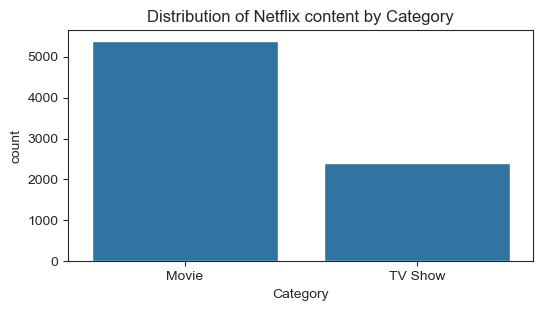

In [74]:
fig = plt.figure(figsize = (6,3))

sns.set_style('ticks')
sns.countplot(data = netflix, x = netflix['Category'])
plt.title('Distribution of Netflix content by Category')
plt.show()

### Distribution of netflix content by Type

In [77]:
netflix['Type'] = netflix['Type'].astype('category')
netflix['Type'].value_counts().head(10)
#top_10_type = 

# The output from the above code is a series that needs to be converted to a dataframe so we can plot.

# top_10_type = top_10_type.reset_index()
# top_10_type.columns = ['Type', 'Count']

# sns.countplot(data = top_10_type, y = 'Type')
# plt.show()

Type
Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Kids' TV                                            205
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Name: count, dtype: int64

### Content Distribution by Ratings

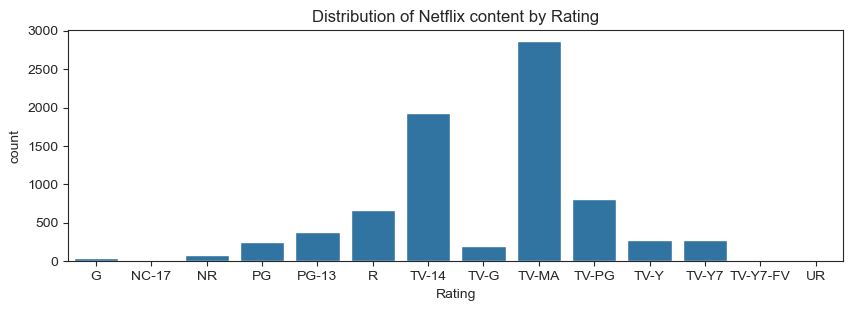

In [80]:
fig = plt.figure(figsize = (10,3))

sns.set_style('ticks')
sns.countplot(data = netflix, x = netflix['Rating'])
plt.title('Distribution of Netflix content by Rating')
plt.show()

### Most popular actor

In [226]:
# Since there are a number of actors for each movie/series in the dataset, 
# I'll need a list t collect all actors for all the movie/series that appear in the dataset 

cast = netflix.dropna(subset=['Cast'])

flat_cast_list = netflix['Cast'].apply(lambda x:x.strip().split(',') if isinstance(x, str) else []).sum()

# next I need to count the number of times an actor appears in the list, this will give me number of movies they occur in

from collections import Counter

actor_count = Counter(flat_cast_list)
top_10_actors = actor_count.most_common(10)

print(top_10_actors)

[(' Anupam Kher', 38), (' Takahiro Sakurai', 28), (' Om Puri', 27), ('Shah Rukh Khan', 27), (' Boman Irani', 25), (' Paresh Rawal', 24), (' Andrea Libman', 24), (' Yuki Kaji', 23), ('Akshay Kumar', 22), (' Vincent Tong', 22)]


### Most popular Director

In [156]:
netflix.groupby(dropna = True, by = 'Director')['Director'].count().sort_values(ascending = False).head(10)

Director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Steven Spielberg          10
David Dhawan               9
Ryan Polito                8
Name: Director, dtype: int64

## Netflix Timeseries Analysis

Here, we'll explore the dataset to identify the release by year, also monthly patterns of the movies.

In [86]:
netflix.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [104]:
netflix['Release_year'] = netflix['Release_Date'].dt.year
netflix['Release_month'] = netflix['Release_Date'].dt.month
netflix.sample(5)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_year,Release_month
6914,s6913,Movie,The Sunshine Makers,Cosmo Feilding-Mellen,NaN,United Kingdom,2017-03-09,TV-MA,91 min,"Documentaries, International Movies",Take a trip and witness the rise and fall of T...,2017.0,3.0
3508,s3509,Movie,Laatu,Manav Shah,"Gagan Kokri, Aditi Sharma, Karamjit Anmol, Sar...",India,2019-05-02,TV-PG,116 min,"Comedies, Dramas, International Movies",A man who hopes to bring light to his village ...,2019.0,5.0
4393,s4394,Movie,Naked,Michael Tiddes,"Marlon Wayans, Regina Hall, Dennis Haysbert, L...",United States,2017-08-11,TV-14,97 min,"Comedies, Romantic Movies",Rob's madly in love and about to be married. U...,2017.0,8.0
4066,s4067,Movie,Michael,Ribhu Dasgupta,"Naseeruddin Shah, Mahie Gill, Sabyasachi Chakr...",India,2020-07-05,TV-MA,86 min,"Dramas, Independent Movies, International Movies",After a dedicated cop accidentally kills a 12-...,2020.0,7.0
3263,s3264,TV Show,K-On!,NaN,"Aki Toyosaki, Ayana Taketatsu, Chika Fujito, M...",Japan,2019-11-15,TV-PG,2 Seasons,"Anime Series, Teen TV Shows",When they're not gorging themselves on sugary ...,2019.0,11.0


In [122]:
movies_by_year = netflix.groupby(by='Release_year', dropna = True)['Release_year'].count()

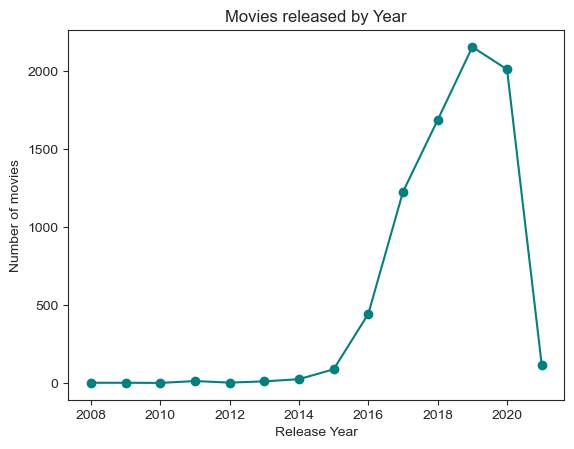

In [130]:
plt.plot(movies_by_year.index, movies_by_year.values, marker = 'o', color = 'teal')
plt.title("Movies released by Year")
plt.xlabel('Release Year')
plt.ylabel('Number of movies')
plt.show()

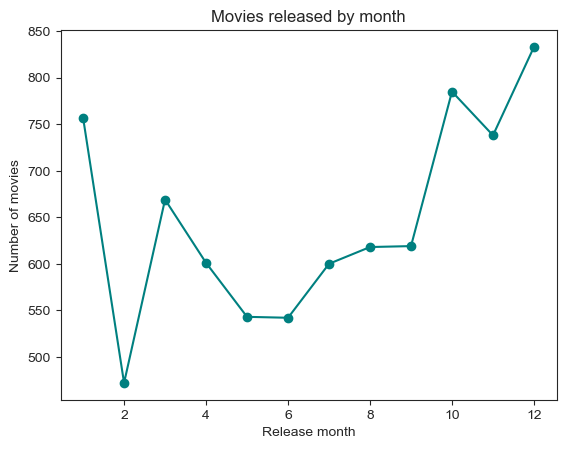

In [134]:
movies_by_month = netflix.groupby(dropna=True, by='Release_month')['Release_month'].count()
plt.plot(movies_by_month.index, movies_by_month.values, marker = 'o', color = 'teal')
plt.title("Movies released by month")
plt.xlabel('Release month')
plt.ylabel('Number of movies')
plt.show()

## Geographical Distribution

Now, let's dive into the geographical spread of netflix movies/series

In [182]:
import plotly.express as px

we need to see the movies/series by country so we'll group the dataset by country and count the number of movie/series for each country.

In [170]:
by_country = netflix.groupby(by = 'Country', dropna = True)['Country'].count()

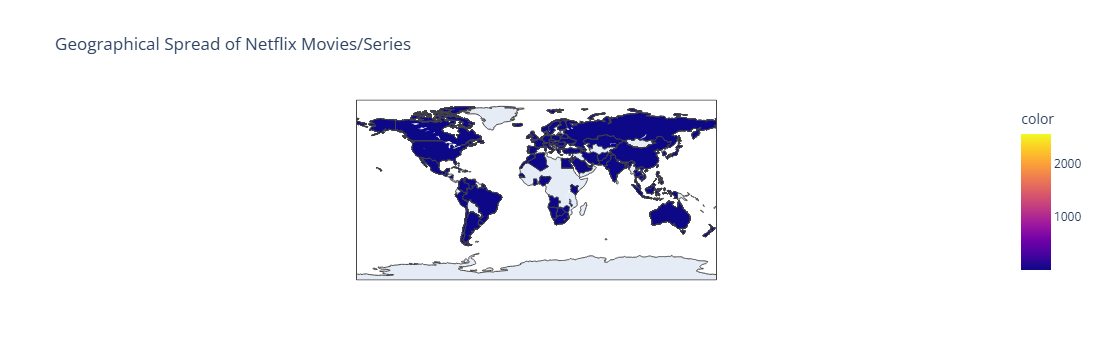

In [188]:
fig = px.choropleth(
    by_country,
    locations = by_country.index,
    locationmode = 'country names',
    color = by_country.values,
    title = 'Geographical Spread of Netflix Movies/Series',
)

fig.show()